# sierraleone_eda.ipynb

In [7]:
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
sns.set(style="whitegrid")

# Load all datasets

In [9]:
sierraleone = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=["Timestamp"])

# Quick look

In [10]:
print("Sierraleone:", sierraleone.shape)

Sierraleone: (525600, 19)


# Preview

In [12]:
sierraleone.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# Basic info

In [14]:
sierraleone.head()
sierraleone.info()
display(sierraleone.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


# Check for missing values

In [16]:
# ensure df is defined (use the loaded 'sierraleone' dataframe if not)
if 'df' not in globals():
	df = sierraleone.copy()

miss = df.isna().mean().sort_values(ascending=False)
print("Columns with >5% missing:")
print(miss[miss > 0.05])

Columns with >5% missing:
Comments    1.0
dtype: float64


# date/time indices

In [17]:
df = df.sort_values("Timestamp")
df = df.set_index("Timestamp")

# Z-score outlier flagging for key columns

In [19]:
cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
z = np.abs(stats.zscore(df[cols].fillna(df[cols].median())))
z_df = pd.DataFrame(z, index=df.index, columns=cols)
outlier_mask = (z_df > 3).any(axis=1)
print(f"Outliers flagged: {outlier_mask.sum()} rows")

Outliers flagged: 16292 rows


# flag rows and inspect

In [21]:
df["outlier"] = outlier_mask
df_outliers = df[df["outlier"]]
df_outliers.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,outlier
Timestamp,,,,,,,,,,,,,,,,,,,
2021-10-30 10:54:00,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6,NaN,True
2021-10-30 10:55:00,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6,NaN,True
2021-10-30 10:56:00,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0,NaN,True
2021-10-30 10:57:00,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7,NaN,True
2021-10-30 10:58:00,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6,NaN,True


# Impute missing in key columns (median)

In [22]:
for c in cols:
    if df[c].isna().sum() > 0:
        df[c] = df[c].fillna(df[c].median())

# cleaning

In [24]:
def clean_solar_data(df):
    # Keep only relevant columns
    df = df[["Timestamp", "GHI", "DNI", "DHI"]]
    
    # Remove negative or impossible values
    for col in ["GHI", "DNI", "DHI"]:
        df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)
    
    # Optionally fill missing values with interpolation
    df = df.interpolate()
    
    return df

# use the already-loaded dataframe 'sierraleone' instead of undefined 'ben_raw'
ben = clean_solar_data(sierraleone)

C:\Users\mulat\AppData\Local\Temp\ipykernel_2528\1717590643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: x if x >= 0 else np.nan)


# Save cleaned file

In [25]:
# import os

# # ensure output directory exists
# os.makedirs("data", exist_ok=True)

# save cleaned dataframe (reset index to include Timestamp column)
df.reset_index().to_csv("data/sierraleone_clean.csv", index=False)

# Time series plots - daily mean

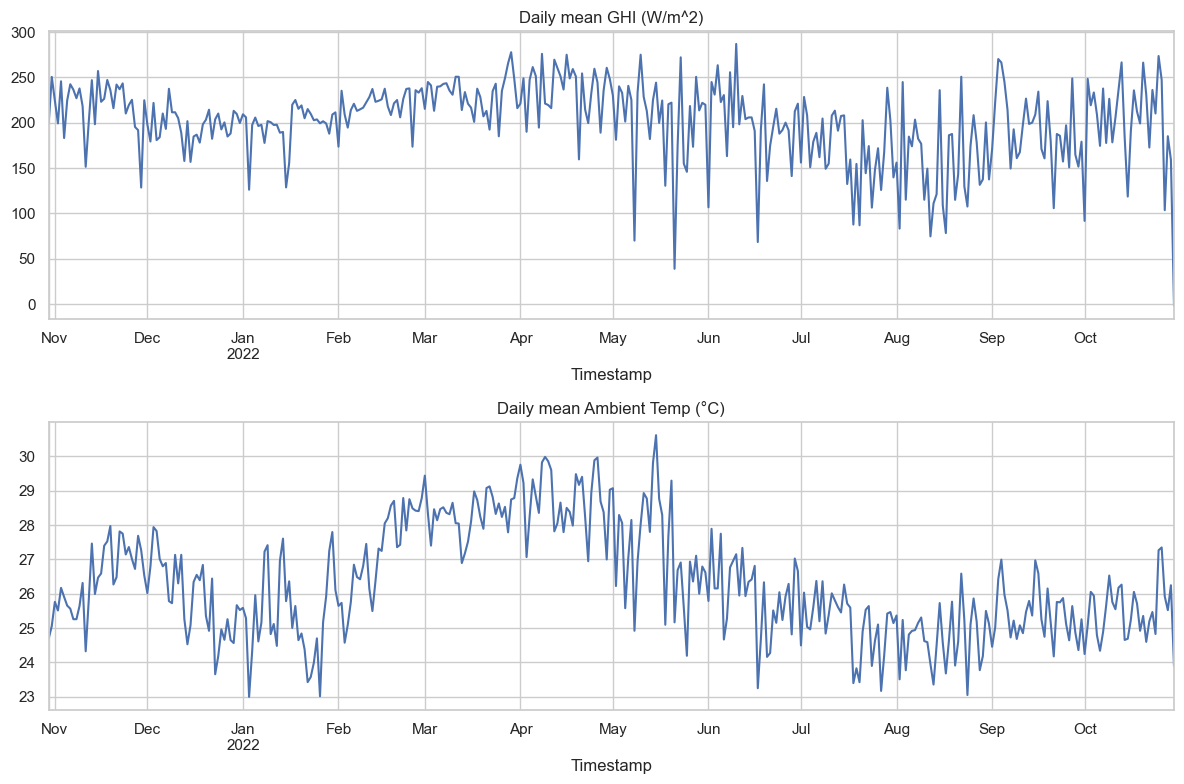

In [26]:
daily = df.resample("D").mean()
fig, ax = plt.subplots(2,1, figsize=(12,8))
daily["GHI"].plot(ax=ax[0], title="Daily mean GHI (W/m^2)")
daily["Tamb"].plot(ax=ax[1], title="Daily mean Ambient Temp (°C)")
plt.tight_layout()

# Boxplots per hour-of-day to inspect diurnal pattern

Text(0.5, 1.0, 'GHI by hour of day')

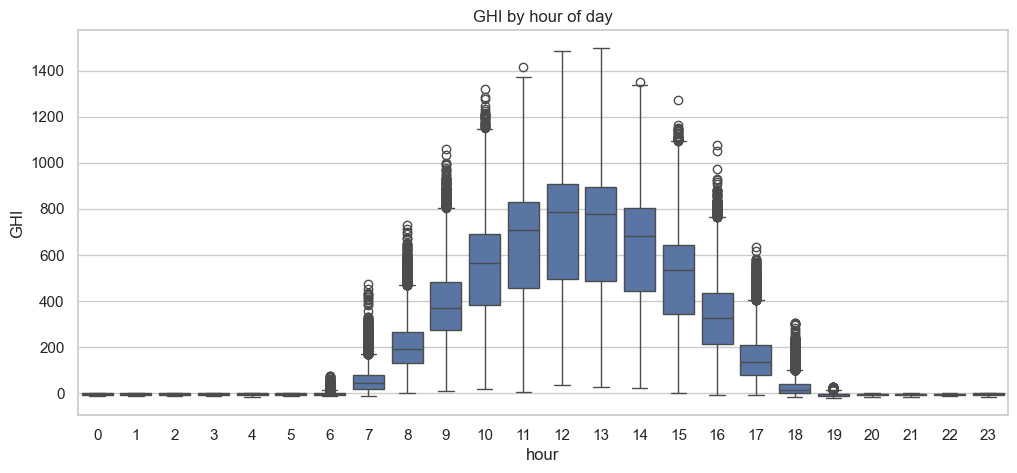

In [27]:
df["hour"] = df.index.hour
plt.figure(figsize=(12,5))
sns.boxplot(x="hour", y="GHI", data=df.reset_index())
plt.title("GHI by hour of day")

# Cleaning impact: group by Cleaning flag

,Cleaning,ModA,ModB
0,0,206.578599,198.038150
1,1,273.309252,277.231102


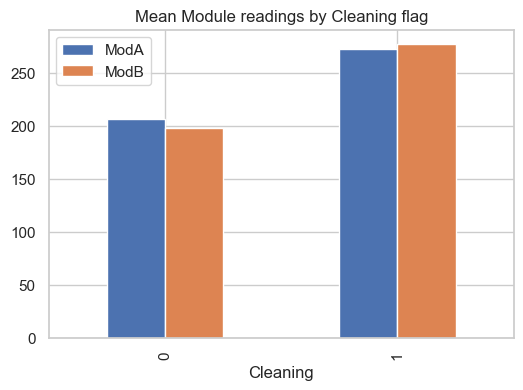

In [28]:
if "Cleaning" in df.columns:
    tmp = df.reset_index().groupby("Cleaning")[["ModA","ModB"]].mean().reset_index()
    display(tmp)
    tmp.plot(kind="bar", x="Cleaning", figsize=(6,4), title="Mean Module readings by Cleaning flag")

# Correlation heatmap

Text(0.5, 1.0, 'Correlation matrix')

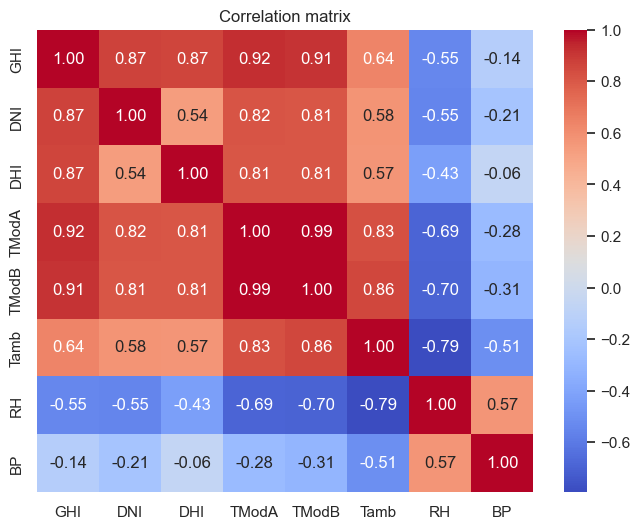

In [29]:
corr_cols = ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","BP"]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")

# Scatter example: WS vs GHI

Text(0.5, 1.0, 'Wind speed vs GHI')

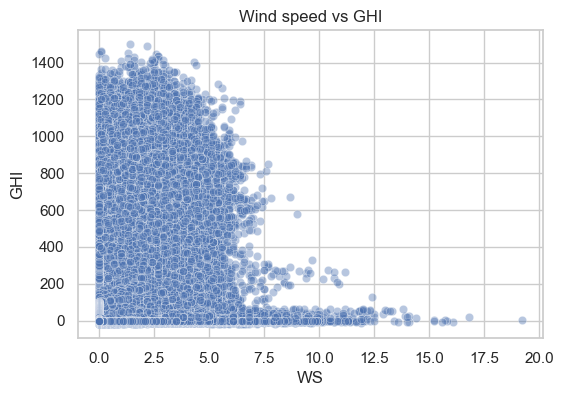

In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="WS", y="GHI", data=df.reset_index(), alpha=0.4)
plt.title("Wind speed vs GHI")